<a href="https://colab.research.google.com/github/tutsilianna/Introduction_to_ML_and_Advanced_ML_Python/blob/main/kNN_and_Naive_Bayes/Classifiers_k_NN_and_Naive_Bayes_%7C_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task

In problems, use the implementation of the k-nn method from the sklearn library:

`from sklearn.neighbors import KNeighborsClassifier`

The parameters that may be needed are: `n_neighbors` - the number of neighbors; `p `is a parameter in the Minkowski distance (p = 1 corresponds to the Manhattan distance, p = 2 corresponds to the Euclidean one).

## **Task1**

A table of some synthetic data is given. You must classify the new object using the $k$-nearest neighbor method.

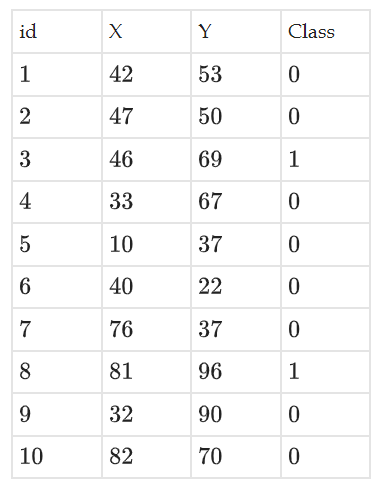

> Enter the distance from the new object with coordinates $(67,95)$  to the nearest neighbor using the Euclidean metric.

> Enter the id of the three nearest points to $(67,95)$ for the Euclidean metric.

> Enter a class for the new object with coordinates $(67,95)$ given $k=3$ for the Euclidean metric.

> Enter the distance from the new object with coordinates $(67,95)$ to the nearest neighbor using the Manhattan distance.

> Enter the id of the three nearest points to $(67,95)$ for the Manhattan distance.

> Enter a class for the new object with coordinates $(67,95)$ given $k=3$ for the Manhattan distance.

In [1]:
X = [42,47,46,33,10,40,76,81,32,82]
Y = [53,50,69,67,37,22,37,96,90,70]
points = [[42, 53],
          [47,50],
          [46, 69],
          [33, 67],
          [10, 37],
          [40, 22],
          [76,37],
          [81,96],
          [32,90],
          [82,70]]

Class = [0,0,1,0,0,0,0,1,0,0]

In [27]:
import numpy as np

def distanceEv(x, y):
    return np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)

def distanceMan(x, y):
    return np.abs(x[0]-y[0]) + np.abs(x[1]-y[1])

In [28]:
new = [67, 95]
r = 10000
ind = 0
dist = {}
for i in range(len(points)):
    r1 = distanceEv(new, points[i])
    dist[i+1] = round(r1, 3)
    if r > r1:
        r = r1
        ind = i
print(f'Nearest neighbor for a new object with coordinates (67, 95): ({points[i][0]}, {points[i][1]})  r={round(r,3)}')

Nearest neighbor for a new object with coordinates (67, 95): (82, 70)  r=14.036


In [29]:
sorted_dist = sorted(dist.items(), key=lambda item: item[1])
print(sorted_dist)
i = sorted_dist[0][0]
j = sorted_dist[1][0]
k = sorted_dist[2][0]
print(Class[i-1], Class[j-1], Class[k-1])
print('Class new object (67, 95) = 1')

[(8, 14.036), (10, 29.155), (3, 33.422), (9, 35.355), (4, 44.045), (1, 48.877), (2, 49.244), (7, 58.694), (6, 77.833), (5, 81.32)]
1 0 1
Class new object (67, 95) = 1


In [30]:
new = [67, 95]
r = 10000
ind = 0
dist = {}
for i in range(len(points)):
    r1 = distanceMan(new, points[i])
    dist[i+1] = round(r1, 3)
    if r > r1:
        r = r1
        ind = i
print(f'Nearest neighbor for a new object with coordinates (67, 95): ({points[i][0]}, {points[i][1]})  r={round(r,3)}')

Nearest neighbor for a new object with coordinates (67, 95): (82, 70)  r=15


In [32]:
sorted_dist = sorted(dist.items(), key=lambda item: item[1])
print(sorted_dist)
i = sorted_dist[0][0]
j = sorted_dist[1][0]
k = sorted_dist[2][0]
print(Class[i-1], Class[j-1], Class[k-1])
print('Class new object (67, 95) = 0')

[(8, 15), (9, 40), (10, 40), (3, 47), (4, 62), (2, 65), (1, 67), (7, 67), (6, 100), (5, 115)]
1 0 0
Class new object (67, 95) = 0


## **Task 2**
[
The provided dataset](https://drive.google.com/file/d/1CEHmYbLl-rTw2noXfKTdzPu2_Jte6U19/view?usp=sharing) comes from the  census and contains information about a certain number of people living in the United States. The problem is to predict whether or not a person earns more than k per year.

Get rid of the features `education` and `marital-status`. Remove the corresponding columns from the dataset. Determine the number of numeric and non-numeric features.

> Enter the number of non-numeric features.

Construct a histogram of the objects distribution by class.

> Calculate the proportion of objects in the class 0.

1. **Building a base model**

    **First approximation**

    Select only numerical features from the dataset. Use `train_test_split()` to split the dataset into training and test samples with parameters `test_size=0.2, random_state=21`. Use stratification by column `label`.

    Find sample mean for the column `fnlwgt` of the obtained training dataset.

    Train the `KNeighborsClassifier()` model with default parameters on the training dataset. Evaluate the model on test dataset.

    > Compute `f1_score()` for the test dataset.
    
    **Feature scaling**

    Train the `MinMaxScaler()` transformation on the training dataset and apply it to the training and test datasets.

    Find sample mean for the column `fnlwgt` of the obtained training dataset.

    Train the `KNeighborsClassifier()` model with default parameters on the training dataset. Evaluate the model on test dataset.

    > Compute `f1_score()` for the test dataset.

2. Working with non-numeric features

    **Visualization**

    Put the non-numeric features back into consideration. Use the original dataset (without columns `education` and `marital-status`). Construct histograms illustrating the frequency of a particular value for each non-numeric feature, e.g., using `sns.barplot()`.

    Histogram of unique values frequencies for some feature.

    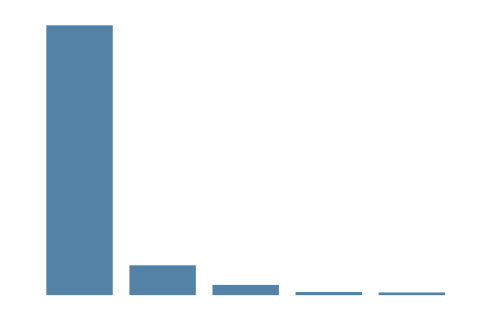

    > Enter the name of the corresponding feature.

    **Removing missing values**

    > Determine the number of rows in the original dataset (without columns `education` and `marital-status`) that contain at least one missing value.

    Remove rows containing missing values. Perform `one-hot` encoding of non-numeric features, e.g., using `pd.get_dummies(drop_first=True)`.

    > Enter the total number of features obtained.

    Using the resulting dataset, train the classification model in the same way as was done for the baseline model (`split`, `scaling`).

    > Perform predictions for the test dataset. Compute `f1_score()`.

    **Filling missing values**

    Using the original dataset (without columns `education` and `marital-status`), fill the missing values with the most frequent value within the column. Next, similar to the previous case: `one-hot`, `split`, `scaling`, training, and evaluation. Compute the `f1_score()` of the model.

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
import seaborn as sns
from matplotlib import pyplot as plt

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
data = pd.read_csv('/content/drive/MyDrive/itmo|AI_cources/adult_data_train.csv', encoding = 'utf-8', delimiter=',')

In [41]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,32,Private,37210,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
1,43,Private,101950,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,0
2,20,?,122244,HS-grad,9,Never-married,?,Not-in-family,White,Female,0,0,28,United-States,0
3,40,Local-gov,24763,Some-college,10,Divorced,Transport-moving,Unmarried,White,Male,6849,0,40,United-States,0
4,24,Private,113936,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0


In [39]:
data['education'].value_counts()

HS-grad         8381
Some-college    5816
Bachelors       4259
Masters         1405
Assoc-voc       1108
11th             931
Assoc-acdm       876
10th             729
7th-8th          526
Prof-school      462
9th              408
12th             354
Doctorate        329
5th-6th          282
1st-4th          140
Preschool         42
Name: education, dtype: int64

In [40]:
data['marital-status'].value_counts()

Married-civ-spouse       11999
Never-married             8502
Divorced                  3560
Separated                  826
Widowed                    811
Married-spouse-absent      332
Married-AF-spouse           18
Name: marital-status, dtype: int64

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             26048 non-null  int64 
 1   workclass       26048 non-null  object
 2   fnlwgt          26048 non-null  int64 
 3   education       26048 non-null  object
 4   education-num   26048 non-null  int64 
 5   marital-status  26048 non-null  object
 6   occupation      26048 non-null  object
 7   relationship    26048 non-null  object
 8   race            26048 non-null  object
 9   sex             26048 non-null  object
 10  capital-gain    26048 non-null  int64 
 11  capital-loss    26048 non-null  int64 
 12  hours-per-week  26048 non-null  int64 
 13  native-country  26048 non-null  object
 14  label           26048 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.0+ MB


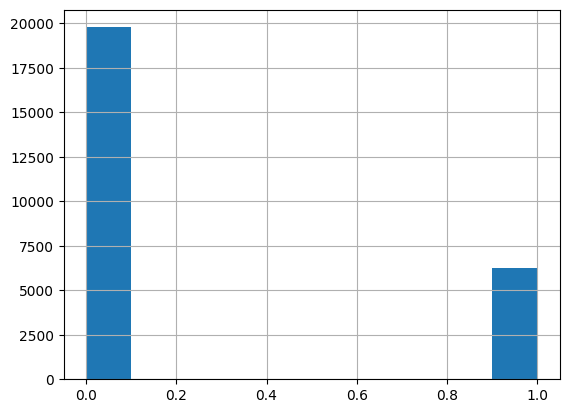

In [49]:
h = data['label'].hist()
fig = h.get_figure()

In [48]:
data_0 = len(data[data['label'] == 0])
round(data_0/len(data) * 100, 3)

75.918

## Task 3

Table contains data about the classification of emails into SPAM and HAM and the total number of words included in these groups:

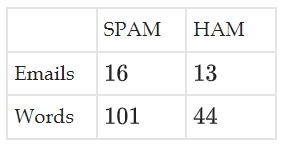

Second table shows data about unique words and number of their occurrences in the aforementioned groups:

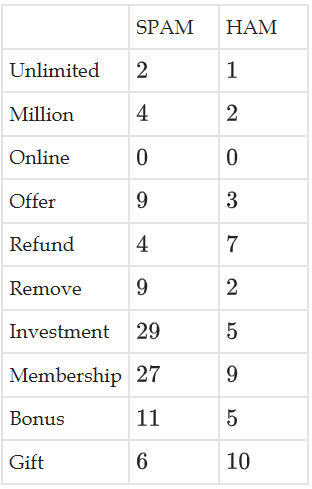

Identify the most probable class of the email containing the following text:

`Access Cash Remove Refund Million Investment Bonus`

> Specify the probability that the email is SPAM based on the training set:

> Calculate $F(spam)$:

> Specify the probability $P(Class = Yes|Email)$ that the email **Access Cash Remove Refund Million Investment Bonus** is SPAM.